In [46]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, ReLU, SpatialDropout2D, Flatten
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 94s 1us/step


In [26]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [47]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

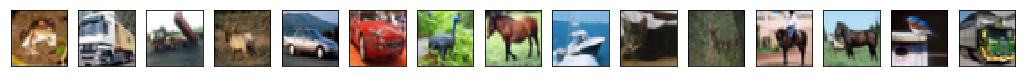

In [27]:
n = 15
plt.figure(figsize=(18,8))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [133]:
inp = Input(shape=(32,32,3))
x = Conv2D(32, (3, 3), padding='same')(inp)
#x = BatchNormalization()(x)
x = ReLU()(x)
x = SpatialDropout2D(0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
x = ReLU()(x)
x = SpatialDropout2D(0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
#x = BatchNormalization(center=False, scale=False)(x)
x = ReLU()(x)
x = SpatialDropout2D(0.2)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
fla = Flatten()(encoded)
dns = Dense(10, activation="softmax")(fla)

In [134]:
clf = Model(inp, dns)
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
re_lu_40 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
spatial_dropout2d_16 (Spatia (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
re_lu_41 (ReLU)              (None, 16, 16, 32)        0         
__________

In [135]:
clf.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [136]:
early_stopper = keras.callbacks.EarlyStopping(monitor='val_acc', 
                                              min_delta=0.001, 
                                              patience=30, 
                                              verbose=0, 
                                              mode='auto', 
                                              restore_best_weights=True)
history = clf.fit(x_train, y_train,
                  epochs=300,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(x_test, y_test),
                  callbacks=[early_stopper]
                  )

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 9s 183us/step - loss: 1.9097 - acc: 0.3073 - val_loss: 1.5539 - val_acc: 0.4431
Epoch 2/300
50000/50000 [==============================] - 8s 159us/step - loss: 1.6002 - acc: 0.4250 - val_loss: 1.4186 - val_acc: 0.4954
Epoch 3/300
50000/50000 [==============================] - 8s 158us/step - loss: 1.4824 - acc: 0.4709 - val_loss: 1.3496 - val_acc: 0.5208
Epoch 4/300
50000/50000 [==============================] - 8s 159us/step - loss: 1.4144 - acc: 0.4969 - val_loss: 1.2658 - val_acc: 0.5501
Epoch 5/300
50000/50000 [==============================] - 8s 158us/step - loss: 1.3596 - acc: 0.5166 - val_loss: 1.2061 - val_acc: 0.5761
Epoch 6/300
50000/50000 [==============================] - 8s 158us/step - loss: 1.3136 - acc: 0.5373 - val_loss: 1.1628 - val_acc: 0.5904
Epoch 7/300
50000/50000 [==============================] - 8s 159us/step - loss: 1.2810 - acc: 0.5454 - val_loss: 1.

50000/50000 [==============================] - 8s 157us/step - loss: 0.9286 - acc: 0.6739 - val_loss: 0.8228 - val_acc: 0.7148
Epoch 118/300
50000/50000 [==============================] - 8s 158us/step - loss: 0.9346 - acc: 0.6715 - val_loss: 0.8327 - val_acc: 0.7119
Epoch 119/300
50000/50000 [==============================] - 8s 158us/step - loss: 0.9318 - acc: 0.6736 - val_loss: 0.8300 - val_acc: 0.7143
Epoch 120/300
50000/50000 [==============================] - 8s 157us/step - loss: 0.9247 - acc: 0.6751 - val_loss: 0.8186 - val_acc: 0.7143
Epoch 121/300
50000/50000 [==============================] - 8s 158us/step - loss: 0.9239 - acc: 0.6760 - val_loss: 0.8188 - val_acc: 0.7164
Epoch 122/300
50000/50000 [==============================] - 8s 158us/step - loss: 0.9209 - acc: 0.6763 - val_loss: 0.8314 - val_acc: 0.7097
Epoch 123/300
50000/50000 [==============================] - 8s 158us/step - loss: 0.9237 - acc: 0.6773 - val_loss: 0.8118 - val_acc: 0.7202
Epoch 124/300
50000/50000 [

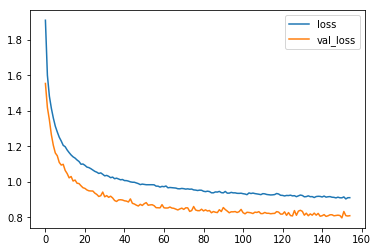

In [137]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

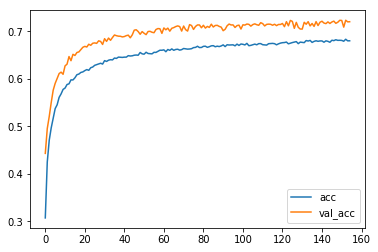

In [138]:
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()